## Regularisation in NNs

Before we start doing anything, I think it's important to understand for NLP, this is the intuitive process on what we are trying to do when we are processing our data in the IMDB dataset:
1. Tokenization: break sentence into individual words
    - Before: `"PyTorch seems really easy to use!"`
    - After: `["PyTorch", "seems", "really", "easy", "to", "use", "!"]`
2. Building vocabulary: build an index of words associated with unique numbers
    - Before: `["PyTorch", "seems", "really", "easy", "to", "use", "!"]`
    - After: `{"Pytorch: 0, "seems": 1, "really": 2, ...}`
3. Convert to numerals: map words to unique numbers (indices)
    - Before: `{"Pytorch: 0, "seems": 1, "really": 2, ...}`
    - After: `[0, 1, 2, ...]`
4. Embedding look-up: map sentences (indices now) to fixed matrices
    - ```[[0.1, 0.4, 0.3],
       [0.8, 0.1, 0.5],
       ...]```
       
## Reference:
- https://gist.github.com/sujitpal/2bffa9d5d93510a201f4064f25c7abad#file-12-regularization-ipynb

# Regularization

Regularization is a loose family of methods to prevent _overfitting_.

Neural Networks are typically over-parameterized and generally have more than enough capacity to represent the data it is trained on. The general strategy is to have an overfit model generalize by adding regularization strategies.

## Taxonomy of Regularization Techniques

* __Parametric__ -- adding prior knowledge to model
  * Initializing weights with specific distributions.
* __Functional__ -- restricting learnable function
  * L1 and L2 (weight decay) regularization 
* __Algorithmic__ -- modifying learning algorithm to reduce generalization error but not training error
  * Early Stopping
  * Dropout
* __Indirect__ -- not regularization but has same effect
  * Batch Normalization
  * Data Augmentation
  * Transfer Learning / Fine Tuning

## Why Regularization?

- While there are many combinations that can minimize the loss function, not all are equally good for generalization

-  Large coefficients tend to amplify both the useful information (signal) and the unwanted noise in the data. This amplification makes the model sensitive to small changes in the input, leading it to overemphasize noise. As a result, it cannot perform well on new, unseen data.

- Smaller coefficients, on the other hand, help the model to focus on the more significant, broader patterns in the data, reducing its sensitivity to minor fluctuations. This approach promotes a better balance, allowing the model to generalize more effectively.

![img](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*lCL30JoOOZjrVQKJ.png)

- Why no regularization on the bias terms?
    - the primary objective of regularization techniques like L1 and L2 is to predominantly prevent overfitting by regulating the magnitude of the model’s weights
    - Biases have a relatively modest impact on model complexity, which typically renders the need to penalize them unnecessary.

## L1 Regularization

- The idea is applying an L1 norm to the solution vector of your machine learning problem (In case of deep learning, it’s the neural network weights.), and trying to make it as small as possible.

- So if your initial goal is finding the best vector x to minimize a loss function f(x), your new task should incorporate the L1 norm of x into the formula, finding the minimum (f(x) + L1norm(x)).

- The claim: 
    - An x with small L1 norm tends to be a sparse solution. 
    - Being sparse means that the majority of x’s components (weights) are zeros, only few are non-zeros.
    - And a sparse solution could avoid over-fitting.

- Now:
    - why does a small L1 norm give a sparse solution?
    - why does a sparse solution avoid over-fitting?
    - what does regularization do really?

## L2 Regularization

![img](https://towardsdatascience.com/wp-content/uploads/2023/11/1VdcJFf5CEOsXojxHG9b9Yw.jpeg)

## What does this graph mean?

- Imagine our loss function is defined by just two weights, w1 and w2 (in the graph we use beta instead of w, but they represent the same concept).
- The axes of the graph represent these weights we aim to optimize.

- Without any weight penalties, our goal is to find w1 and w2 values that minimize our loss function. You can visualize this function’s landscape as a valley or basin, illustrated in the graph by the elliptical contours.
- The center of the elliptical contour indicates the global minimum of the objective function, where we find our ideal weights.

- Now the Penalties:
    - The L1 norm, shown as a diamond shape, essentially measures the Manhattan distance of w1 and w2 from the origin. 
    - The L2 norm forms a circle, representing the sum of squared weights.

- The centers of the L1 and L2 shapes (diamond and circle) at the origin, where all weights are zero, highlight the minimal weight penalty scenario. As we increasing the penalty term’s intensity, the model’s weights would gravitate closer to zero. 

## What is the intersection point?

- Need an understanding of `Lagrange multipliers` (a key tool used in optimzation)
- Lagrange multipliers aid in finding the optimal points (maximum or minimum) of a function within certain constraints.


### Lagrange Multipliers

- Imagine you’re hiking up a mountain with the goal of reaching the peak. There are various paths, but due to safety, you’re required to stay on a designated safe path. Here, reaching the peak represents the optimization problem, and the safe path symbolizes the constraints.

- Mathematically, suppose you have a function f(x, y) to optimize. This optimization must adhere to a constraint, represented by another function g(x, y) = 0.

![img](https://towardsdatascience.com/wp-content/uploads/2023/11/0-eOHTaB_PybL55F.png)

- In the ‘Lagrange Multipliers 2D’ graph from Wikipedia, the blue contours represent f(x, y) (the mountain’s landscape), and the red curves indicate the constraints. The point where these two intersect, although not the peak point on the f(x, y) contour, represents the `optimal solution under the given constraint.`
- Lagrange multipliers solve this by merging the objective function with its constraints. In other words, Lagrange multipliers will help you find the point easier.

So, connecting this to the previous graphs:

![img](https://towardsdatascience.com/wp-content/uploads/2023/11/1wB7K1ubmrJsB2_vgQvKDTA.png)

- The Diamond and Circle represent the constraints (L1 and L2 norms).

## L1 Regularization (Diamond Shape)

- When the optimization process (like gradient descent) seeks the point that minimizes the loss function while staying within this diamond, it’s more likely to hit these corners. At these corners, one of the weights (parameters of the model) becomes zero while others remain non-zero.

- This property of the L1 norm leads to sparsity in the model parameters, meaning some weights are exactly zero. This sparsity is useful for feature selection, as it effectively removes some features from the model.

## L2 Regularization (Circle Shape)

- The smooth, round nature of the circle means that the optimization process is less likely to find solutions at the axes where weights are zero.

- Instead, the L2 norm tends to shrink the weights uniformly without necessarily driving any to zero. This controls the model complexity by preventing weights from becoming too large, thereby helping to avoid overfitting. 

- However, unlike the L1 norm, it doesn’t lead to sparsity in the model parameters.

## Dropout

![img](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*9fepFNw9l4xUcG8gl78s1w.png)

- Dropout is a regularization technique designed to prevent overfitting in neural networks.

- The idea is simple: during training, we randomly deactivate or “drop out” a certain percentage of neurons in the network, forcing the remaining neurons to pick up the slack.

- This prevents any single neuron or group of neurons from becoming overly dependent on one another, which can lead to overfitting.

- By dropping out neurons, we’re essentially creating a variety of different “thinned” networks from the same architecture. Each thinned network is trained on slightly different combinations of neurons, forcing the model to generalize better.

### Motivation?

- Overfitting occurs when a model becomes too specialized to the training data. It picks up on subtle patterns or noise that may not be relevant in new data.

- Dropout helps mitigate this by adding randomness to the training process. But why does this randomness help?

-  Imagine neurons in a fully connected network. Each neuron in one layer depends on every neuron in the previous layer to compute its output. This can lead to co-adaptation, where neurons become reliant on specific neurons in the previous layer. If one of those neurons learns something specific to the training data, the entire network may start to overfit.

- Dropout addresses this by removing the ability for neurons to form these dependencies. Instead of being able to rely on specific neurons, each neuron must be robust and learn features that are useful even when other neurons are missing.


## Batch Normalization

- Formula: 
    - $x_i = \gamma * \frac{x_i - \mu}{\sigma} + \beta$
    - Where, $\gamma$ and $\beta$ are learnable parameters.
- mean and variance are calculated over the batch.
- regularization by noise injection. -- Why?
    - Batch norm is done over a batch, i.e.
        - you compute a mean and the variance on a mini batch
        - a mini batch of maybe 64 observations and so what you’re effectively doing is you’re subtracting some empirical mean and that's obviously noisy
        - And you’re dividing by some empirical standard deviation. Which is also noisy.
        - so you're basically getting a random shift and a random scale from any batch.



## Imports

In [1]:
# Critical plotting imports
import matplotlib.pyplot as plt
%matplotlib inline

# Checnking for module version 
from cmp_version import cmp_version 

# PyTorch imports
from torchtext import __version__ as ttver
# https://github.com/pytorch/text/releases/tag/v0.9.0-rc5
if cmp_version(ttver,"0.9.0")>=0: 
    from torchtext.legacy import data, datasets
else:
    from torchtext import data, datasets
import torch
import torch.nn as nn
import torch.nn.functional as F

# Checking for iterable objects
import collections
import random

In [2]:
# Set seed
torch.manual_seed(1337)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(1337)

In [3]:
# # Set plotting style
plt.style.use(('dark_background', 'bmh'))
plt.rc('axes', facecolor='none')
plt.rc('figure', figsize=(16, 4))

## Load Data

In [4]:
# Create instances of fields
# The important field here is fix_length: all examples using this field will be padded to, or None for flexible sequence lengths
# We are fixing this because we will be using a FNN not an LSTM/RNN/GRU where we can go through uneven sequence lengths
max_len = 80
text = data.Field(sequential=True, fix_length=max_len, batch_first=True, lower=True, dtype=torch.long)
label = data.LabelField(sequential=False, dtype=torch.float)

In [5]:
# Calling splits() class method of datasets.IMDB to return a torchtext.data.Dataset object
datasets.IMDB.download('./')
ds_train, ds_test = datasets.IMDB.splits(text, label, path='./imdb/aclImdb/')

In [6]:
# Training and test set each 25k samples
# 2 fields due to the way we split above
print('train : ', len(ds_train))
print('test : ', len(ds_test))
print('train.fields :', ds_train.fields)

train :  25000
test :  25000
train.fields : {'text': <torchtext.legacy.data.field.Field object at 0x7fb5ebff7670>, 'label': <torchtext.legacy.data.field.LabelField object at 0x7fb5ebff79a0>}


In [7]:
# Get validation set
seed_num = 1337
ds_train, ds_valid = ds_train.split(random_state=random.seed(seed_num))

In [8]:
# Now we've training, validation and test set
print('train : ', len(ds_train))
print('valid : ', len(ds_valid))
print('valid : ', len(ds_test))

train :  17500
valid :  7500
valid :  25000


In [9]:
# Build vocabulary
# num_words = 25000
num_words = 1000
text.build_vocab(ds_train, max_size=num_words)
label.build_vocab(ds_train)

In [10]:
# Print vocab size
print('Vocabulary size: {}'.format(len(text.vocab)))
print('Label size: {}'.format(len(label.vocab)))

Vocabulary size: 1002
Label size: 2


In [11]:
# Print most common vocabulary text
most_common_samples = 10
print(text.vocab.freqs.most_common(most_common_samples))

[('the', 225411), ('a', 111661), ('and', 110736), ('of', 101281), ('to', 93618), ('is', 73247), ('in', 63011), ('i', 49141), ('this', 49010), ('that', 46426)]


In [12]:
# Print most common labels
print(label.vocab.freqs.most_common())

[('neg', 8835), ('pos', 8665)]


In [13]:
# Sample 0 label
ds_train[0].label

'neg'

In [14]:
# Sample 0 text: broken down into individual portions
ds_train[0].text

['just',
 'about',
 'everything',
 'in',
 'this',
 'movie',
 'is',
 'wrong,',
 'wrong,',
 'wrong.',
 'take',
 'mike',
 'myers,',
 'for',
 'example.',
 "he's",
 'reached',
 'the',
 'point',
 'where',
 'you',
 'realize',
 'that',
 'his',
 'shtick',
 "hasn't",
 'changed',
 'since',
 'his',
 'snl',
 'days,',
 'over',
 'ten',
 'years',
 'ago.',
 "he's",
 'doing',
 'the',
 'same',
 'cutesy',
 'stream-of-consciousness',
 'jokes',
 'and',
 'the',
 'same',
 'voices.',
 'his',
 'cat',
 'is',
 'painfully',
 'unfunny.',
 'he',
 'tries',
 'way',
 'to',
 'hard.',
 "he's",
 'some',
 'weird',
 'type',
 'a',
 'comedian,',
 'not',
 'the',
 'cool',
 'cat',
 "he's",
 'supposed',
 'to',
 'be.',
 'the',
 'rest',
 'of',
 'the',
 'movie',
 'is',
 'just',
 'as',
 'bad.',
 'the',
 'sets',
 'are',
 'unbelievably',
 'ugly',
 '---',
 'and',
 'clearly',
 'a',
 'waste',
 'of',
 'millions',
 'of',
 'dollars.',
 '(cardboard',
 'cut-outs',
 'for',
 'the',
 'background',
 'buildings',
 'would',
 'have',
 'made',
 'more'

In [15]:
# Sample 0 text: human readeable sample
def show_text(sample):
    print(' '.join(word for word in sample))
    
show_text(ds_train[0].text)

just about everything in this movie is wrong, wrong, wrong. take mike myers, for example. he's reached the point where you realize that his shtick hasn't changed since his snl days, over ten years ago. he's doing the same cutesy stream-of-consciousness jokes and the same voices. his cat is painfully unfunny. he tries way to hard. he's some weird type a comedian, not the cool cat he's supposed to be. the rest of the movie is just as bad. the sets are unbelievably ugly --- and clearly a waste of millions of dollars. (cardboard cut-outs for the background buildings would have made more sense than constructing an entire neighborhood and main street.) alec balwin tries to do a funny great santini impression, but he ends up looking and sounding incoherent. there's even an innapropriate cheesecake moment with faux celebrity paris hilton --- that sticks in the mind simply because this is supposed to be a dr. seuss story. avoid this movie at all costs, folks. it's not even an interesting train 

## Data Loader

In [16]:
# Create and iterable object for our training, validation and testing datasets
# Batches examples of similar lengths together that minimizes amount of padding needed
batch_size = 64  # Change batch size from 1 to bigger number once explanation is done
train_loader, valid_loader, test_loader = data.BucketIterator.splits(
    (ds_train, ds_valid, ds_test), batch_size=batch_size, sort_key=lambda x: len(x.text), repeat=False
)

In [17]:
# Check if iterator above is an iterable which should show True
isinstance(train_loader, collections.Iterable)

<ipython-input-17-d3991e923379>:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  isinstance(train_loader, collections.Iterable)


True

In [18]:
# What's inside this iteratable object? Our text and label although now everything is in machine format (not "words") but in numbers!
# The text we saw above becomes a matrix of size 1 x 80 represented by the fixed length we defined before that
list(train_loader)[0]


[torchtext.legacy.data.batch.Batch of size 64]
	[.text]:[torch.LongTensor of size 64x80]
	[.label]:[torch.FloatTensor of size 64]

In [19]:
# Alternative to above, this is much faster but the above code is easy to understand and implement
next(train_loader.__iter__())


[torchtext.legacy.data.batch.Batch of size 64]
	[.text]:[torch.LongTensor of size 64x80]
	[.label]:[torch.FloatTensor of size 64]

In [20]:
test_batch = next(train_loader.__iter__())

In [21]:
# What methods can we call on this batch object? Text and label
test_batch.fields

dict_keys(['text', 'label'])

In [22]:
# Let's break this down to check what's in a batch
test_batch.text

tensor([[190,  10, 180,  ...,   2,  24,   7],
        [  9, 178, 206,  ...,  97,   0,  29],
        [ 52,   7,   3,  ...,  48,   0,  21],
        ...,
        [  0,   0,   4,  ...,   2,   0,   0],
        [  2,   0, 654,  ...,   0,   0, 148],
        [  9, 201,  10,  ...,  22,   0, 550]])

In [23]:
# 1 comment per batch, each comment is limited to a size of 80 as we've defined
test_batch.text.size()

torch.Size([64, 80])

In [24]:
test_batch.label

tensor([1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
        0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        1., 1., 0., 0., 0., 1., 0., 1., 0., 1.])

In [25]:
# Extremely weird problem in torchtext where BucketIterator returns a Batch object versus just a simple tuple of tensors containing our text index and labels
# So let's fix this with a new class FixBatchGenerator

class FixBatchGenerator:
    def __init__(self, dl, x_field, y_field):
        self.dl, self.x_field, self.y_field = dl, x_field, y_field
        
    def __len__(self):
        return len(self.dl)
    
    def __iter__(self):
        for batch in self.dl:
            X = getattr(batch, self.x_field)
            y = getattr(batch, self.y_field)
            yield (X,y)

            
train_loader = FixBatchGenerator(train_loader, 'text', 'label')
valid_loader = FixBatchGenerator(valid_loader, 'text', 'label')
test_loader = FixBatchGenerator(test_loader, 'text', 'label')

In [26]:
# Text index
print(next(train_loader.__iter__())[0])

# Text label
print(next(train_loader.__iter__())[1])

tensor([[  9,   0,   0,  ...,  60,   0,  74],
        [ 10,   7,   3,  ...,  39, 575,   2],
        [  0,  10, 135,  ...,  12,   6, 206],
        ...,
        [  0,   9, 178,  ...,  28,   0,  12],
        [  0,  17,   2,  ..., 101,   0,  38],
        [  0,   0,  62,  ...,   0,   0, 177]])
tensor([1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
        0., 0., 0., 0., 1., 1., 1., 0., 1., 0.])


## Baseline

### Network

In [27]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Embedding layer
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        
        # Linear function
        self.fc1 = nn.Linear(embedding_dim*embedding_dim, hidden_dim) 

        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        # Embedding
        embedded = self.embedding(x)
        embedded = embedded.view(-1, embedding_dim*embedding_dim)
        # Linear function
        out = self.fc1(embedded)

        # Non-linearity
        out = torch.relu(out)
        
        # Toggle 3: Dropout
        # out = torch.dropout(out, 0.8)

        # Linear function (readout)
        # Take note here use a final sigmoid function so your loss should not go through sigmoid again.
        # BCELoss is the right class to use as it doesn't pass your output through a sigmoid function again.
        # In multi-class problems you're used to softmax which can be simplified to a logistic,
        # function when you have a two-class problem.
        out = self.fc2(out)
        out = torch.sigmoid(out)
    
        return out

In [28]:
input_dim = num_words + 2
embedding_dim = max_len
hidden_dim = 32
output_dim = 1

# Instantiate model class and assign to object
model = FeedforwardNeuralNetModel(input_dim, embedding_dim, hidden_dim, output_dim)

# Push model to CUDA device if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizer
# Toggle 2: L2 Norm option - this is called weight decay
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.005)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [29]:
# Number of groups of parameters
print('Number of groups of parameters {}'.format(len(list(model.parameters()))))
print('-'*50)
# Print parameters
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())
print('-'*50)

Number of groups of parameters 5
--------------------------------------------------
torch.Size([1002, 80])
torch.Size([32, 6400])
torch.Size([32])
torch.Size([1, 32])
torch.Size([1])
--------------------------------------------------


### Training Loop

In [30]:
iter = 0
num_epochs = 10
history_train_acc_0, history_val_acc_0, history_train_loss_0, history_val_loss_0 = [], [], [], []
best_accuracy = 0
for epoch in range(num_epochs):
#     print('-'*50)
    for i, (samples, labels) in enumerate(train_loader):
        # Training mode
        model.train()
        
        # Load samples
        samples = samples.view(-1, max_len).to(device)
        labels = labels.view(-1, 1).to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(samples)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Toggle 1: L1 norm, add to original loss
        # fc1_params = torch.cat([x.view(-1) for x in model.fc1.parameters()])
        # loss += 0.001 * torch.norm(fc1_params, 1)
    
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Get training statistics
            train_loss = loss.data.item()
            
            # Testing mode
            model.eval()
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for samples, labels in valid_loader:
                # Load samples
                samples = samples.view(-1, max_len).to(device)
                labels = labels.view(-1).to(device)

                # Forward pass only to get logits/output
                outputs = model(samples)
                
                # Val loss
                val_loss = criterion(outputs.view(-1, 1), labels.view(-1, 1))
                
                # We use a threshold to define. 
                # There is another way to do this with one-hot label. Feel free to explore and understand what are the pros/cons of each.
                # This opens up a whole topic on why it becomes problematic when we expand beyond 2 class to 10 classes.
                # Why do we encode? Why can't we do 0, 1, 2, 3, 4 etc. without one-hot encoding?
                predicted = outputs.ge(0.5).view(-1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum().item()
                # correct = (predicted == labels.byte()).int().sum().item()
            
            accuracy = 100. * correct / total
        
            # Print Loss
            print('Iter: {} | Train Loss: {} | Val Loss: {} | Val Accuracy: {}'.format(iter, train_loss, val_loss.item(), round(accuracy, 2)))
            
            # Append to history
            history_val_loss_0.append(val_loss.data.item())
            history_val_acc_0.append(round(accuracy, 2))
            history_train_loss_0.append(train_loss)
            
            # Save model when accuracy beats best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                # We can load this best model on the validation set later
                torch.save(model.state_dict(), 'best_model.pth')

Iter: 100 | Train Loss: 0.691243052482605 | Val Loss: 0.685560405254364 | Val Accuracy: 52.59
Iter: 200 | Train Loss: 0.6649552583694458 | Val Loss: 0.6192490458488464 | Val Accuracy: 55.59
Iter: 300 | Train Loss: 0.644988477230072 | Val Loss: 0.5516107678413391 | Val Accuracy: 58.43
Iter: 400 | Train Loss: 0.5724755525588989 | Val Loss: 0.6089349389076233 | Val Accuracy: 58.57
Iter: 500 | Train Loss: 0.558177649974823 | Val Loss: 0.4621509313583374 | Val Accuracy: 62.12
Iter: 600 | Train Loss: 0.39767521619796753 | Val Loss: 0.4762592613697052 | Val Accuracy: 62.83
Iter: 700 | Train Loss: 0.5065121650695801 | Val Loss: 0.5164039731025696 | Val Accuracy: 62.93
Iter: 800 | Train Loss: 0.46617329120635986 | Val Loss: 0.4972568452358246 | Val Accuracy: 64.19
Iter: 900 | Train Loss: 0.22484073042869568 | Val Loss: 0.6290019154548645 | Val Accuracy: 64.15
Iter: 1000 | Train Loss: 0.18472328782081604 | Val Loss: 0.5441626906394958 | Val Accuracy: 64.09
Iter: 1100 | Train Loss: 0.142983973026

### Training Curves

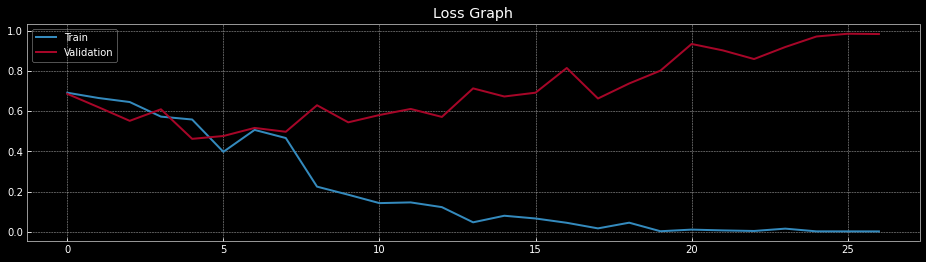

In [31]:
# Plotting loss graph
plt.plot(history_train_loss_0, label='Train')
plt.plot(history_val_loss_0, label='Validation')
plt.title('Loss Graph')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Validation Accuracy')

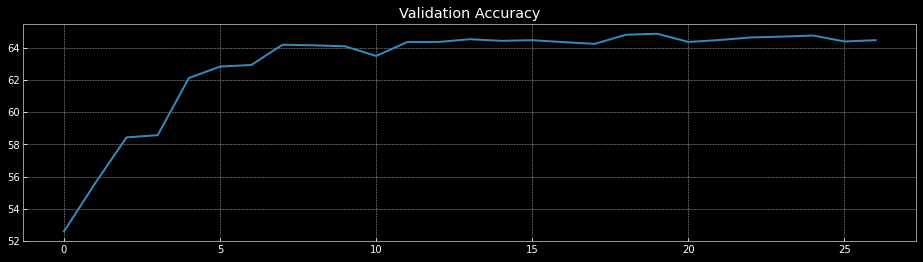

In [32]:
# Plotting validation accuracy graph
plt.plot(history_val_acc_0)
plt.title('Validation Accuracy')

## Parametric 1: Adding Prior Knowledge to Model

Usually means that one initializes the weights to specific distributions instead of random.

### Network

In [33]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim,
                 initialize_weights=False):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Embedding layer
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        
        # Linear function
        self.fc1 = nn.Linear(embedding_dim*embedding_dim, hidden_dim) 

        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
        if initialize_weights:
            torch.nn.init.xavier_uniform_(self.embedding.weight)
            torch.nn.init.xavier_uniform_(self.fc1.weight)
            torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        # Embedding
        embedded = self.embedding(x)
        embedded = embedded.view(-1, embedding_dim*embedding_dim)
        # Linear function
        out = self.fc1(embedded)

        # Non-linearity
        out = torch.relu(out)
        
        # Toggle 3: Dropout
        # out = torch.dropout(out, 0.8)

        # Linear function (readout)
        # Take note here use a final sigmoid function so your loss should not go through sigmoid again.
        # BCELoss is the right class to use as it doesn't pass your output through a sigmoid function again.
        # In multi-class problems you're used to softmax which can be simplified to a logistic,
        # function when you have a two-class problem.
        out = self.fc2(out)
        out = torch.sigmoid(out)
    
        return out

### Training Loop

In [34]:
input_dim = num_words + 2
embedding_dim = max_len
hidden_dim = 32
output_dim = 1

# Instantiate model class and assign to object
model = FeedforwardNeuralNetModel(input_dim, embedding_dim, hidden_dim, output_dim,
                                  initialize_weights=True)

# Push model to CUDA device if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizer
# Toggle 2: L2 Norm option - this is called weight decay
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.005)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [35]:
iter = 0
num_epochs = 10
history_train_acc_1, history_val_acc_1, history_train_loss_1, history_val_loss_1 = [], [], [], []
best_accuracy = 0
for epoch in range(num_epochs):
#     print('-'*50)
    for i, (samples, labels) in enumerate(train_loader):
        # Training mode
        model.train()
        
        # Load samples
        samples = samples.view(-1, max_len).to(device)
        labels = labels.view(-1, 1).to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(samples)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Toggle 1: L1 norm, add to original loss
        # fc1_params = torch.cat([x.view(-1) for x in model.fc1.parameters()])
        # loss += 0.001 * torch.norm(fc1_params, 1)
    
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Get training statistics
            train_loss = loss.data.item()
            
            # Testing mode
            model.eval()
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for samples, labels in valid_loader:
                # Load samples
                samples = samples.view(-1, max_len).to(device)
                labels = labels.view(-1).to(device)

                # Forward pass only to get logits/output
                outputs = model(samples)
                
                # Val loss
                val_loss = criterion(outputs.view(-1, 1), labels.view(-1, 1))
                
                # We use a threshold to define. 
                # There is another way to do this with one-hot label. Feel free to explore and understand what are the pros/cons of each.
                # This opens up a whole topic on why it becomes problematic when we expand beyond 2 class to 10 classes.
                # Why do we encode? Why can't we do 0, 1, 2, 3, 4 etc. without one-hot encoding?
                predicted = outputs.ge(0.5).view(-1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum().item()
                # correct = (predicted == labels.byte()).int().sum().item()
            
            accuracy = 100. * correct / total
        
            # Print Loss
            print('Iter: {} | Train Loss: {} | Val Loss: {} | Val Accuracy: {}'.format(iter, train_loss, val_loss.item(), round(accuracy, 2)))
            
            # Append to history
            history_val_loss_1.append(val_loss.data.item())
            history_val_acc_1.append(round(accuracy, 2))
            history_train_loss_1.append(train_loss)
            
            # Save model when accuracy beats best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                # We can load this best model on the validation set later
                torch.save(model.state_dict(), 'best_model_1.pth')

Iter: 100 | Train Loss: 0.6434608697891235 | Val Loss: 0.6380903124809265 | Val Accuracy: 61.4
Iter: 200 | Train Loss: 0.5745137929916382 | Val Loss: 0.4739680588245392 | Val Accuracy: 70.93
Iter: 300 | Train Loss: 0.514424741268158 | Val Loss: 0.46899425983428955 | Val Accuracy: 73.17
Iter: 400 | Train Loss: 0.40835675597190857 | Val Loss: 0.5148271322250366 | Val Accuracy: 72.77
Iter: 500 | Train Loss: 0.38931983709335327 | Val Loss: 0.4465191662311554 | Val Accuracy: 72.47
Iter: 600 | Train Loss: 0.2892666757106781 | Val Loss: 0.3578641414642334 | Val Accuracy: 71.4
Iter: 700 | Train Loss: 0.23473544418811798 | Val Loss: 0.5575879216194153 | Val Accuracy: 70.13
Iter: 800 | Train Loss: 0.30472612380981445 | Val Loss: 0.3725654184818268 | Val Accuracy: 69.03
Iter: 900 | Train Loss: 0.07961718738079071 | Val Loss: 0.41416481137275696 | Val Accuracy: 69.27
Iter: 1000 | Train Loss: 0.08179456740617752 | Val Loss: 0.3983740508556366 | Val Accuracy: 69.17
Iter: 1100 | Train Loss: 0.0235178

### Training Curves

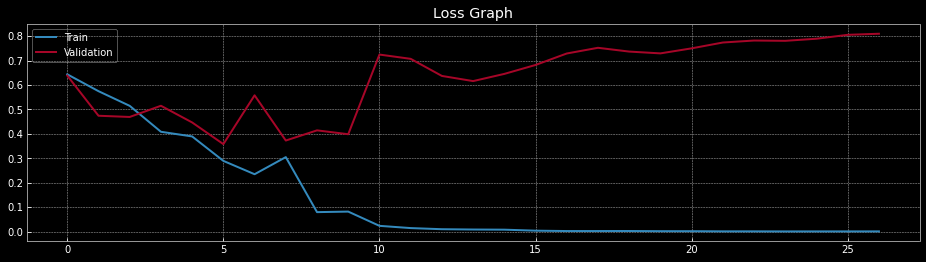

In [36]:
# Plotting loss graph
plt.plot(history_train_loss_1, label='Train')
plt.plot(history_val_loss_1, label='Validation')
plt.title('Loss Graph')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Validation Accuracy')

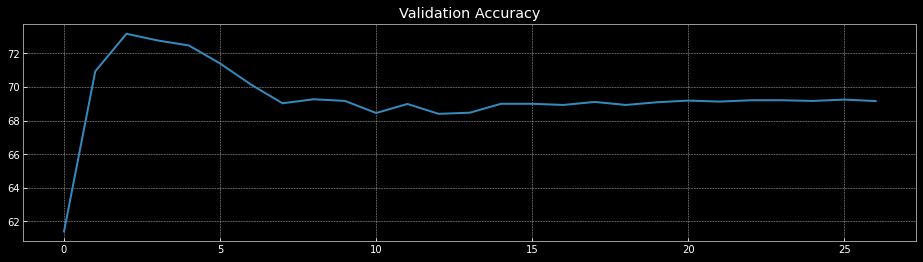

In [37]:
# Plotting validation accuracy graph
plt.plot(history_val_acc_1)
plt.title('Validation Accuracy')

## Functional 2.1: Restricting Learnable Function (L1 regularization)

### Network

No changes in network, we can just call it with default parameters, ie, `initialize_weights=False`.

### Training Loop

Objective of L1 regularization is to restrict the weights of the network towards 0. This is done by adding a regularizer term to the loss function containing the 1-norm of the parameters of the model.

In [38]:
input_dim = num_words + 2
embedding_dim = max_len
hidden_dim = 32
output_dim = 1

# Instantiate model class and assign to object
model = FeedforwardNeuralNetModel(input_dim, embedding_dim, hidden_dim, output_dim)

# Push model to CUDA device if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizer
# Toggle 2: L2 Norm option - this is called weight decay
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.005)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [39]:
iter = 0
num_epochs = 10
history_train_acc_2, history_val_acc_2, history_train_loss_2, history_val_loss_2 = [], [], [], []
best_accuracy = 0
for epoch in range(num_epochs):
#     print('-'*50)
    for i, (samples, labels) in enumerate(train_loader):
        # Training mode
        model.train()
        
        # Load samples
        samples = samples.view(-1, max_len).to(device)
        labels = labels.view(-1, 1).to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(samples)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Toggle 1: L1 norm, add to original loss
        # ####################################################################
        fc1_params = torch.cat([x.view(-1) for x in model.fc1.parameters()])
#         loss += 0.001 * torch.norm(fc1_params, 1)
        fc2_params = torch.cat([x.view(-1) for x in model.fc2.parameters()])
        loss += 0.001 * (torch.norm(fc1_params, 1) + torch.norm(fc2_params, 1))
        # ####################################################################
    
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Get training statistics
            train_loss = loss.data.item()
            
            # Testing mode
            model.eval()
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for samples, labels in valid_loader:
                # Load samples
                samples = samples.view(-1, max_len).to(device)
                labels = labels.view(-1).to(device)

                # Forward pass only to get logits/output
                outputs = model(samples)
                
                # Val loss
                val_loss = criterion(outputs.view(-1, 1), labels.view(-1, 1))
                
                # We use a threshold to define. 
                # There is another way to do this with one-hot label. Feel free to explore and understand what are the pros/cons of each.
                # This opens up a whole topic on why it becomes problematic when we expand beyond 2 class to 10 classes.
                # Why do we encode? Why can't we do 0, 1, 2, 3, 4 etc. without one-hot encoding?
                predicted = outputs.ge(0.5).view(-1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum().item()
                # correct = (predicted == labels.byte()).int().sum().item()
            
            accuracy = 100. * correct / total
        
            # Print Loss
            print('Iter: {} | Train Loss: {} | Val Loss: {} | Val Accuracy: {}'.format(iter, train_loss, val_loss.item(), round(accuracy, 2)))
            
            # Append to history
            history_val_loss_2.append(val_loss.data.item())
            history_val_acc_2.append(round(accuracy, 2))
            history_train_loss_2.append(train_loss)
            
            # Save model when accuracy beats best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                # We can load this best model on the validation set later
                torch.save(model.state_dict(), 'best_model_2.pth')

Iter: 100 | Train Loss: 0.8968726396560669 | Val Loss: 0.6933504939079285 | Val Accuracy: 52.97
Iter: 200 | Train Loss: 0.8850858211517334 | Val Loss: 0.7012791633605957 | Val Accuracy: 52.61
Iter: 300 | Train Loss: 0.8835084438323975 | Val Loss: 0.6849543452262878 | Val Accuracy: 54.36
Iter: 400 | Train Loss: 0.7853503227233887 | Val Loss: 0.6128271222114563 | Val Accuracy: 55.89
Iter: 500 | Train Loss: 0.8008366823196411 | Val Loss: 0.6662547588348389 | Val Accuracy: 57.49
Iter: 600 | Train Loss: 0.7854050993919373 | Val Loss: 0.5761398673057556 | Val Accuracy: 58.91
Iter: 700 | Train Loss: 0.7626585960388184 | Val Loss: 0.668764054775238 | Val Accuracy: 61.47
Iter: 800 | Train Loss: 0.7500191330909729 | Val Loss: 0.563574492931366 | Val Accuracy: 62.71
Iter: 900 | Train Loss: 0.7499464154243469 | Val Loss: 0.6150270104408264 | Val Accuracy: 65.52
Iter: 1000 | Train Loss: 0.7351253032684326 | Val Loss: 0.5829649567604065 | Val Accuracy: 64.63
Iter: 1100 | Train Loss: 0.71766746044158

### Training Curves

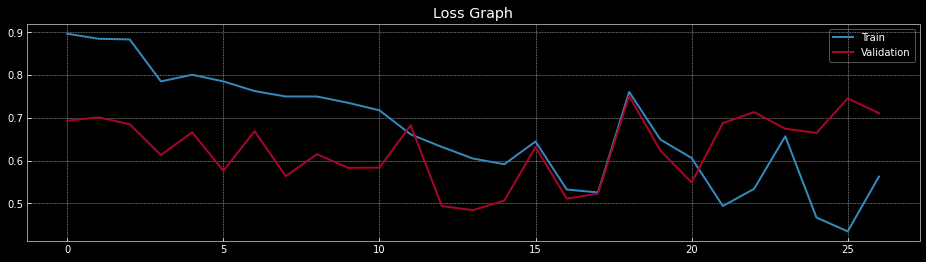

In [40]:
# Plotting loss graph
plt.plot(history_train_loss_2, label='Train')
plt.plot(history_val_loss_2, label='Validation')
plt.title('Loss Graph')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Validation Accuracy')

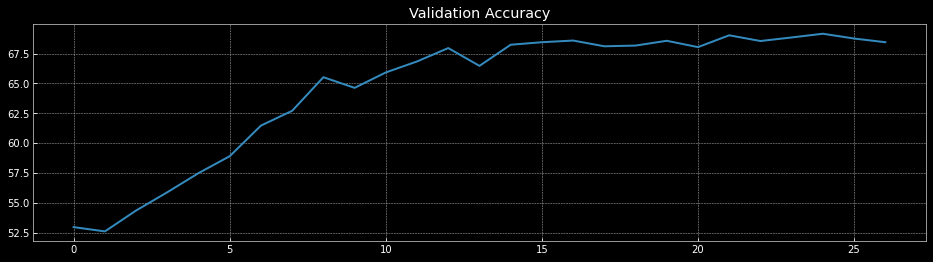

In [41]:
# Plotting validation accuracy graph
plt.plot(history_val_acc_2)
plt.title('Validation Accuracy')

## Functional 2.2: Restricting Learnable Function (L2 regularization / weight decay)

### Network

No changes needed for the network.

### Training Loop

Can be done both ways, either by adding a `weight_decay` parameter to the optimizer, or by adding the L2 norm of the layer weights to the loss. Second approach similar to L1 regularization described above.

In [42]:
input_dim = num_words + 2
embedding_dim = max_len
hidden_dim = 32
output_dim = 1

# Instantiate model class and assign to object
model = FeedforwardNeuralNetModel(input_dim, embedding_dim, hidden_dim, output_dim)

# Push model to CUDA device if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizer
# Toggle 2: L2 Norm option - this is called weight decay
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.005)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [43]:
iter = 0
num_epochs = 10
history_train_acc_3, history_val_acc_3, history_train_loss_3, history_val_loss_3 = [], [], [], []
best_accuracy = 0
for epoch in range(num_epochs):
#     print('-'*50)
    for i, (samples, labels) in enumerate(train_loader):
        # Training mode
        model.train()
        
        # Load samples
        samples = samples.view(-1, max_len).to(device)
        labels = labels.view(-1, 1).to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(samples)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Toggle 1: L1 norm, add to original loss
#         fc1_params = torch.cat([x.view(-1) for x in model.fc1.parameters()])
#         loss += 0.001 * torch.norm(fc1_params, 1)
    
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Get training statistics
            train_loss = loss.data.item()
            
            # Testing mode
            model.eval()
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for samples, labels in valid_loader:
                # Load samples
                samples = samples.view(-1, max_len).to(device)
                labels = labels.view(-1).to(device)

                # Forward pass only to get logits/output
                outputs = model(samples)
                
                # Val loss
                val_loss = criterion(outputs.view(-1, 1), labels.view(-1, 1))
                
                # We use a threshold to define. 
                # There is another way to do this with one-hot label. Feel free to explore and understand what are the pros/cons of each.
                # This opens up a whole topic on why it becomes problematic when we expand beyond 2 class to 10 classes.
                # Why do we encode? Why can't we do 0, 1, 2, 3, 4 etc. without one-hot encoding?
                predicted = outputs.ge(0.5).view(-1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum().item()
                # correct = (predicted == labels.byte()).int().sum().item()
            
            accuracy = 100. * correct / total
        
            # Print Loss
            print('Iter: {} | Train Loss: {} | Val Loss: {} | Val Accuracy: {}'.format(iter, train_loss, val_loss.item(), round(accuracy, 2)))
            
            # Append to history
            history_val_loss_3.append(val_loss.data.item())
            history_val_acc_3.append(round(accuracy, 2))
            history_train_loss_3.append(train_loss)
            
            # Save model when accuracy beats best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                # We can load this best model on the validation set later
                torch.save(model.state_dict(), 'best_model_3.pth')

Iter: 100 | Train Loss: 0.6698310971260071 | Val Loss: 0.704235851764679 | Val Accuracy: 52.87
Iter: 200 | Train Loss: 0.6776701211929321 | Val Loss: 0.6541276574134827 | Val Accuracy: 54.39
Iter: 300 | Train Loss: 0.612124502658844 | Val Loss: 0.5352939963340759 | Val Accuracy: 55.35
Iter: 400 | Train Loss: 0.6967016458511353 | Val Loss: 0.5992451310157776 | Val Accuracy: 56.03
Iter: 500 | Train Loss: 0.7740015387535095 | Val Loss: 0.6086034774780273 | Val Accuracy: 56.13
Iter: 600 | Train Loss: 0.6159039735794067 | Val Loss: 0.5599578619003296 | Val Accuracy: 55.53
Iter: 700 | Train Loss: 0.5987639427185059 | Val Loss: 0.7038238644599915 | Val Accuracy: 56.44
Iter: 800 | Train Loss: 0.6415882706642151 | Val Loss: 0.5606452226638794 | Val Accuracy: 58.21
Iter: 900 | Train Loss: 0.5834193825721741 | Val Loss: 0.6676176190376282 | Val Accuracy: 56.55
Iter: 1000 | Train Loss: 0.5698237419128418 | Val Loss: 0.5733292102813721 | Val Accuracy: 57.15
Iter: 1100 | Train Loss: 0.48316353559494

### Training Curves

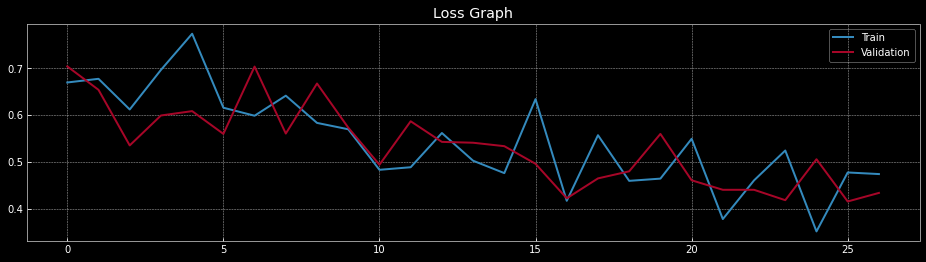

In [44]:
# Plotting loss graph
plt.plot(history_train_loss_3, label='Train')
plt.plot(history_val_loss_3, label='Validation')
plt.title('Loss Graph')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Validation Accuracy')

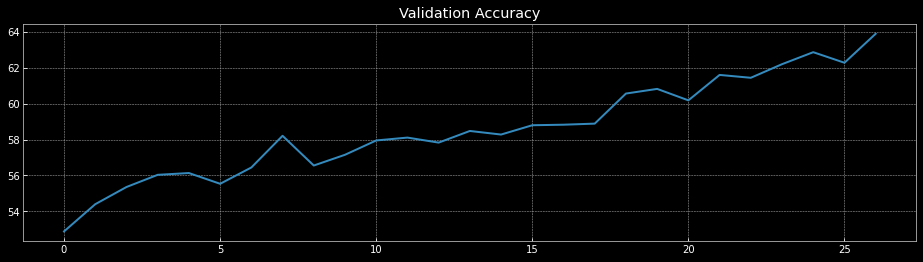

In [45]:
# Plotting validation accuracy graph
plt.plot(history_val_acc_3)
plt.title('Validation Accuracy')

## Algorithmic 3.1: Early Stopping

Modifying learning algorithm to reduce generalization error but not training error.

### Network

No change in network structure.

### Training Loop

Training loop will now check for 

In [46]:
input_dim = num_words + 2
embedding_dim = max_len
hidden_dim = 32
output_dim = 1

# Instantiate model class and assign to object
model = FeedforwardNeuralNetModel(input_dim, embedding_dim, hidden_dim, output_dim)

# Push model to CUDA device if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizer
# Toggle 2: L2 Norm option - this is called weight decay
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.005)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [47]:
iter = 0
num_epochs = 10
history_train_acc_4, history_val_acc_4, history_train_loss_4, history_val_loss_4 = [], [], [], []
best_accuracy = 0

early_stop = False   # early stopping
min_val_loss = None
num_epochs_stop = 5
epochs_no_improve = 0

for epoch in range(num_epochs):
#     print('-'*50)
    for i, (samples, labels) in enumerate(train_loader):
        # Training mode
        model.train()
        
        # Load samples
        samples = samples.view(-1, max_len).to(device)
        labels = labels.view(-1, 1).to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(samples)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Toggle 1: L1 norm, add to original loss
#         fc1_params = torch.cat([x.view(-1) for x in model.fc1.parameters()])
#         loss += 0.001 * torch.norm(fc1_params, 1)
    
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
        iter += 1

        if iter % 100 == 0:
            # Get training statistics
            train_loss = loss.data.item()
            
            # Testing mode
            model.eval()
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for samples, labels in valid_loader:
                # Load samples
                samples = samples.view(-1, max_len).to(device)
                labels = labels.view(-1).to(device)

                # Forward pass only to get logits/output
                outputs = model(samples)
                
                # Val loss
                val_loss = criterion(outputs.view(-1, 1), labels.view(-1, 1))
                
                # We use a threshold to define. 
                # There is another way to do this with one-hot label. Feel free to explore and understand what are the pros/cons of each.
                # This opens up a whole topic on why it becomes problematic when we expand beyond 2 class to 10 classes.
                # Why do we encode? Why can't we do 0, 1, 2, 3, 4 etc. without one-hot encoding?
                predicted = outputs.ge(0.5).view(-1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum().item()
                # correct = (predicted == labels.byte()).int().sum().item()
            
            accuracy = 100. * correct / total
        
            # Print Loss
            print('Iter: {} | Train Loss: {} | Val Loss: {} | Val Accuracy: {}'.format(iter, train_loss, val_loss.item(), round(accuracy, 2)))

            ### Early Stopping Check ###
            ### https://www.kaggle.com/akhileshrai/tutorial-early-stopping-vanilla-rnn-pytorch
            # If the validation loss is at a minimum
            val_loss_np = val_loss.item()
            if min_val_loss is None:
                min_val_loss = val_loss_np
            else:
                if val_loss_np < min_val_loss:
                    epochs_no_improve = 0
                    min_val_loss = val_loss_np
                else:
                    epochs_no_improve += 1
            iter += 1
            if epoch > 5 and epochs_no_improve == num_epochs_stop:
                print('Early stopping!' )
                early_stop = True
                break
            ### end of Early Stopping check
            
            # Append to history
            history_val_loss_4.append(val_loss.data.item())
            history_val_acc_4.append(round(accuracy, 2))
            history_train_loss_4.append(train_loss)
            
            # Save model when accuracy beats best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                # We can load this best model on the validation set later
                torch.save(model.state_dict(), 'best_model_4.pth')
                
    # Check early stopping condition
    if early_stop:
        print("Stopped")
        torch.save(model.state_dict(), 'best_model_4.pth')
        break


Iter: 100 | Train Loss: 0.6910862922668457 | Val Loss: 0.692387044429779 | Val Accuracy: 54.44
Iter: 200 | Train Loss: 0.6879244446754456 | Val Loss: 0.6597493290901184 | Val Accuracy: 55.96
Iter: 300 | Train Loss: 0.622555136680603 | Val Loss: 0.6950249671936035 | Val Accuracy: 57.28
Iter: 400 | Train Loss: 0.5822204351425171 | Val Loss: 0.5236734747886658 | Val Accuracy: 59.44
Iter: 500 | Train Loss: 0.5852950215339661 | Val Loss: 0.569950520992279 | Val Accuracy: 61.63
Iter: 600 | Train Loss: 0.4305810332298279 | Val Loss: 0.47103700041770935 | Val Accuracy: 62.63
Iter: 700 | Train Loss: 0.46027034521102905 | Val Loss: 0.40290388464927673 | Val Accuracy: 62.75
Iter: 800 | Train Loss: 0.5200461745262146 | Val Loss: 0.41819509863853455 | Val Accuracy: 63.32
Iter: 900 | Train Loss: 0.28289297223091125 | Val Loss: 0.37377071380615234 | Val Accuracy: 63.87
Iter: 1000 | Train Loss: 0.22161388397216797 | Val Loss: 0.36738845705986023 | Val Accuracy: 64.23
Iter: 1100 | Train Loss: 0.3572716

### Training Curves

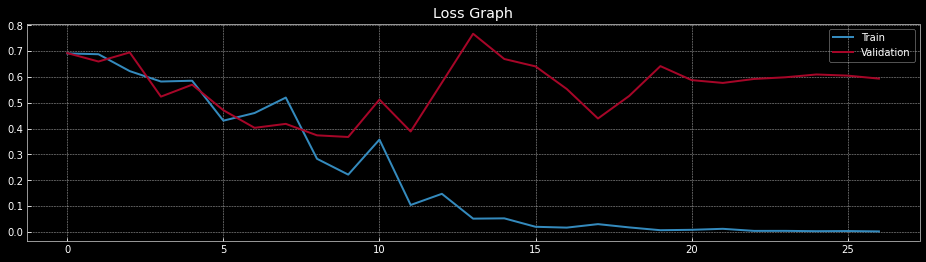

In [48]:
# Plotting loss graph
plt.plot(history_train_loss_4, label='Train')
plt.plot(history_val_loss_4, label='Validation')
plt.title('Loss Graph')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Validation Accuracy')

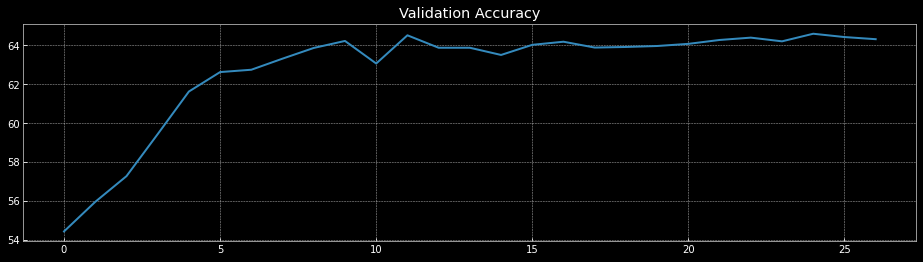

In [49]:
# Plotting validation accuracy graph
plt.plot(history_val_acc_4)
plt.title('Validation Accuracy')

## Indirect 4.1: Dropout

### Network

In [50]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim,
                 dropout_pct = 0.0,
                 initialize_weights=False):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Embedding layer
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        
        # Linear function
        self.fc1 = nn.Linear(embedding_dim*embedding_dim, hidden_dim) 

        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
        if initialize_weights:
            torch.nn.init.xavier_uniform_(self.embedding.weight)
            torch.nn.init.xavier_uniform_(self.fc1.weight)
            torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.dropout_pct = dropout_pct

    def forward(self, x):
        # Embedding
        embedded = self.embedding(x)
        embedded = embedded.view(-1, embedding_dim*embedding_dim)
        # Linear function
        out = self.fc1(embedded)

        # Non-linearity
        out = torch.relu(out)
        
        # Toggle 3: Dropout (default used in original code: 0.8)
        if self.dropout_pct > 0:
            out = torch.dropout(out, p=dropout_pct, train=self.training)

        # Linear function (readout)
        # Take note here use a final sigmoid function so your loss should not go through sigmoid again.
        # BCELoss is the right class to use as it doesn't pass your output through a sigmoid function again.
        # In multi-class problems you're used to softmax which can be simplified to a logistic,
        # function when you have a two-class problem.
        out = self.fc2(out)
        out = torch.sigmoid(out)
    
        return out

### Training Loop

In [51]:
input_dim = num_words + 2
embedding_dim = max_len
hidden_dim = 32
output_dim = 1
dropout_pct = 0.8   # this is what was in original code

# Instantiate model class and assign to object
model = FeedforwardNeuralNetModel(input_dim, embedding_dim, hidden_dim, output_dim,
                                  dropout_pct=dropout_pct)

# Push model to CUDA device if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizer
# Toggle 2: L2 Norm option - this is called weight decay
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.005)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [52]:
iter = 0
num_epochs = 10
history_train_acc_5, history_val_acc_5, history_train_loss_5, history_val_loss_5 = [], [], [], []
best_accuracy = 0
for epoch in range(num_epochs):
#     print('-'*50)
    for i, (samples, labels) in enumerate(train_loader):
        # Training mode
        model.train()
        
        # Load samples
        samples = samples.view(-1, max_len).to(device)
        labels = labels.view(-1, 1).to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(samples)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Toggle 1: L1 norm, add to original loss
#         fc1_params = torch.cat([x.view(-1) for x in model.fc1.parameters()])
#         loss += 0.001 * torch.norm(fc1_params, 1)
    
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Get training statistics
            train_loss = loss.data.item()
            
            # Testing mode
            model.eval()
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for samples, labels in valid_loader:
                # Load samples
                samples = samples.view(-1, max_len).to(device)
                labels = labels.view(-1).to(device)

                # Forward pass only to get logits/output
                outputs = model(samples)
                
                # Val loss
                val_loss = criterion(outputs.view(-1, 1), labels.view(-1, 1))
                
                # We use a threshold to define. 
                # There is another way to do this with one-hot label. Feel free to explore and understand what are the pros/cons of each.
                # This opens up a whole topic on why it becomes problematic when we expand beyond 2 class to 10 classes.
                # Why do we encode? Why can't we do 0, 1, 2, 3, 4 etc. without one-hot encoding?
                predicted = outputs.ge(0.5).view(-1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum().item()
                # correct = (predicted == labels.byte()).int().sum().item()
            
            accuracy = 100. * correct / total
        
            # Print Loss
            print('Iter: {} | Train Loss: {} | Val Loss: {} | Val Accuracy: {}'.format(iter, train_loss, val_loss.item(), round(accuracy, 2)))
            
            # Append to history
            history_val_loss_5.append(val_loss.data.item())
            history_val_acc_5.append(round(accuracy, 2))
            history_train_loss_5.append(train_loss)
            
            # Save model when accuracy beats best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                # We can load this best model on the validation set later
                torch.save(model.state_dict(), 'best_model_5.pth')

Iter: 100 | Train Loss: 0.6960393190383911 | Val Loss: 0.7031258940696716 | Val Accuracy: 48.88
Iter: 200 | Train Loss: 0.6892494559288025 | Val Loss: 0.6985400319099426 | Val Accuracy: 48.97
Iter: 300 | Train Loss: 0.6821810007095337 | Val Loss: 0.6981098055839539 | Val Accuracy: 48.96
Iter: 400 | Train Loss: 0.6968421339988708 | Val Loss: 0.69722980260849 | Val Accuracy: 48.71
Iter: 500 | Train Loss: 0.6858571171760559 | Val Loss: 0.6904107928276062 | Val Accuracy: 48.8
Iter: 600 | Train Loss: 0.6985050439834595 | Val Loss: 0.6840927600860596 | Val Accuracy: 51.76
Iter: 700 | Train Loss: 0.7098813056945801 | Val Loss: 0.6936395168304443 | Val Accuracy: 53.57
Iter: 800 | Train Loss: 0.6921101212501526 | Val Loss: 0.6846234798431396 | Val Accuracy: 54.2
Iter: 900 | Train Loss: 0.675839900970459 | Val Loss: 0.6728613376617432 | Val Accuracy: 53.72
Iter: 1000 | Train Loss: 0.6946123242378235 | Val Loss: 0.682217538356781 | Val Accuracy: 54.47
Iter: 1100 | Train Loss: 0.6810269951820374 |

### Training Curves

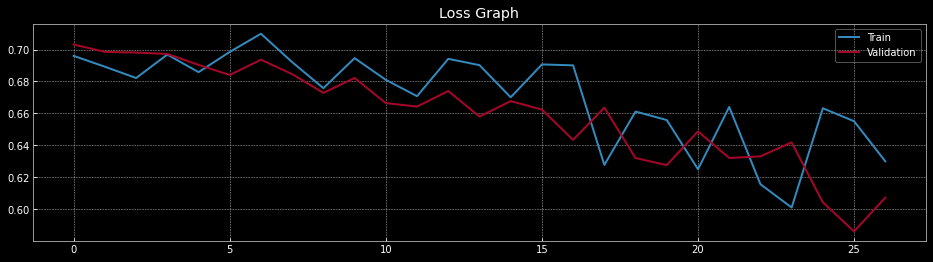

In [53]:
# Plotting loss graph
plt.plot(history_train_loss_5, label='Train')
plt.plot(history_val_loss_5, label='Validation')
plt.title('Loss Graph')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Validation Accuracy')

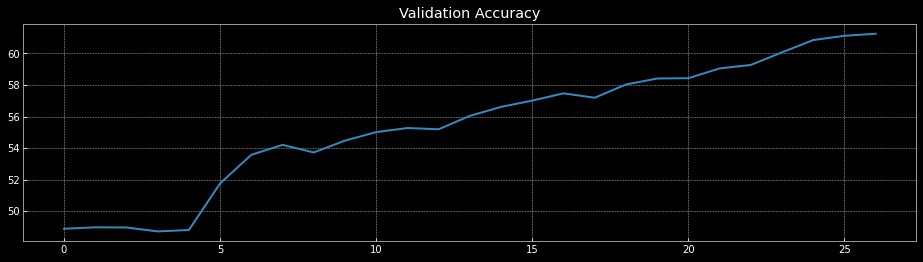

In [54]:
# Plotting validation accuracy graph
plt.plot(history_val_acc_5)
plt.title('Validation Accuracy')

## Indirect 4.2: BatchNorm

### Network

In [55]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim,
                 dropout_pct = 0.0,
                 initialize_weights=False,
                 use_batchnorm=False):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Embedding layer
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        
        # Linear function
        self.fc1 = nn.Linear(embedding_dim*embedding_dim, hidden_dim)

        # optional batchnorm
        if use_batchnorm:
            self.bn1 = nn.BatchNorm1d(embedding_dim * embedding_dim)
        else:
            self.bn1 = None
            
        # Linear function (readout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
        if initialize_weights:
            torch.nn.init.xavier_uniform_(self.embedding.weight)
            torch.nn.init.xavier_uniform_(self.fc1.weight)
            torch.nn.init.xavier_uniform_(self.fc2.weight)
        self.dropout_pct = dropout_pct

    def forward(self, x):
        # Embedding
        embedded = self.embedding(x)
        embedded = embedded.view(-1, embedding_dim*embedding_dim)
        # Linear function
        out = self.fc1(embedded)

        if self.bn1 is not None:
            out = self.bn1(out)
            
        # Non-linearity
        out = torch.relu(out)
        
        # Toggle 3: Dropout (default used in original code: 0.8)
        if self.dropout_pct > 0:
            out = torch.dropout(out, p=dropout_pct, train=self.training)

        # Linear function (readout)
        # Take note here use a final sigmoid function so your loss should not go through sigmoid again.
        # BCELoss is the right class to use as it doesn't pass your output through a sigmoid function again.
        # In multi-class problems you're used to softmax which can be simplified to a logistic,
        # function when you have a two-class problem.
        out = self.fc2(out)
        out = torch.sigmoid(out)
    
        return out

### Training Loop

In [56]:
input_dim = num_words + 2
embedding_dim = max_len
hidden_dim = 32
output_dim = 1
dropout_pct = 0.8   # this is what was in original code

# Instantiate model class and assign to object
model = FeedforwardNeuralNetModel(input_dim, embedding_dim, hidden_dim, output_dim,
                                  dropout_pct=dropout_pct)

# Push model to CUDA device if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss function
criterion = nn.BCELoss()

# Optimizer
# Toggle 2: L2 Norm option - this is called weight decay
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.005)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [57]:
iter = 0
num_epochs = 10
history_train_acc_6, history_val_acc_6, history_train_loss_6, history_val_loss_6 = [], [], [], []
best_accuracy = 0
for epoch in range(num_epochs):
#     print('-'*50)
    for i, (samples, labels) in enumerate(train_loader):
        # Training mode
        model.train()
        
        # Load samples
        samples = samples.view(-1, max_len).to(device)
        labels = labels.view(-1, 1).to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(samples)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)
        
        # Toggle 1: L1 norm, add to original loss
#         fc1_params = torch.cat([x.view(-1) for x in model.fc1.parameters()])
#         loss += 0.001 * torch.norm(fc1_params, 1)
    
        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 100 == 0:
            # Get training statistics
            train_loss = loss.data.item()
            
            # Testing mode
            model.eval()
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for samples, labels in valid_loader:
                # Load samples
                samples = samples.view(-1, max_len).to(device)
                labels = labels.view(-1).to(device)

                # Forward pass only to get logits/output
                outputs = model(samples)
                
                # Val loss
                val_loss = criterion(outputs.view(-1, 1), labels.view(-1, 1))
                
                # We use a threshold to define. 
                # There is another way to do this with one-hot label. Feel free to explore and understand what are the pros/cons of each.
                # This opens up a whole topic on why it becomes problematic when we expand beyond 2 class to 10 classes.
                # Why do we encode? Why can't we do 0, 1, 2, 3, 4 etc. without one-hot encoding?
                predicted = outputs.ge(0.5).view(-1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted.type(torch.FloatTensor).cpu() == labels.type(torch.FloatTensor)).sum().item()
                # correct = (predicted == labels.byte()).int().sum().item()
            
            accuracy = 100. * correct / total
        
            # Print Loss
            print('Iter: {} | Train Loss: {} | Val Loss: {} | Val Accuracy: {}'.format(iter, train_loss, val_loss.item(), round(accuracy, 2)))
            
            # Append to history
            history_val_loss_6.append(val_loss.data.item())
            history_val_acc_6.append(round(accuracy, 2))
            history_train_loss_6.append(train_loss)
            
            # Save model when accuracy beats best accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                # We can load this best model on the validation set later
                torch.save(model.state_dict(), 'best_model_6.pth')

Iter: 100 | Train Loss: 0.7014918327331543 | Val Loss: 0.6985331177711487 | Val Accuracy: 50.36
Iter: 200 | Train Loss: 0.6943099498748779 | Val Loss: 0.6990044116973877 | Val Accuracy: 49.12
Iter: 300 | Train Loss: 0.6955150365829468 | Val Loss: 0.6972861289978027 | Val Accuracy: 48.83
Iter: 400 | Train Loss: 0.7005130052566528 | Val Loss: 0.6891350150108337 | Val Accuracy: 49.96
Iter: 500 | Train Loss: 0.6931066513061523 | Val Loss: 0.6954178214073181 | Val Accuracy: 49.05
Iter: 600 | Train Loss: 0.706365704536438 | Val Loss: 0.7008278965950012 | Val Accuracy: 49.45
Iter: 700 | Train Loss: 0.6912071108818054 | Val Loss: 0.6961744427680969 | Val Accuracy: 53.68
Iter: 800 | Train Loss: 0.6855694055557251 | Val Loss: 0.6926569938659668 | Val Accuracy: 51.19
Iter: 900 | Train Loss: 0.6670827865600586 | Val Loss: 0.6924158930778503 | Val Accuracy: 50.07
Iter: 1000 | Train Loss: 0.6761055588722229 | Val Loss: 0.6950595378875732 | Val Accuracy: 50.61
Iter: 1100 | Train Loss: 0.6727048158645

### Training Curves

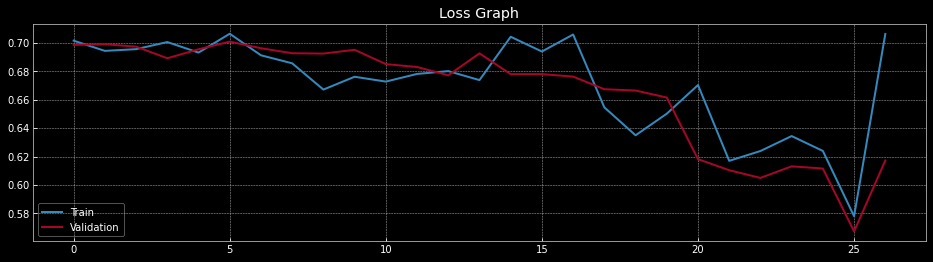

In [58]:
# Plotting loss graph
plt.plot(history_train_loss_6, label='Train')
plt.plot(history_val_loss_6, label='Validation')
plt.title('Loss Graph')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Validation Accuracy')

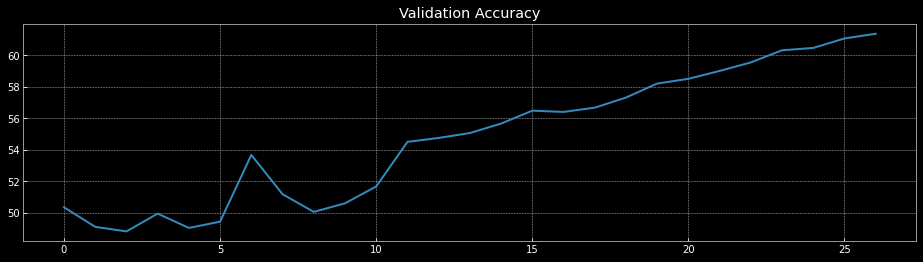

In [59]:
# Plotting validation accuracy graph
plt.plot(history_val_acc_6)
plt.title('Validation Accuracy')

## Summary

<BarContainer object of 7 artists>

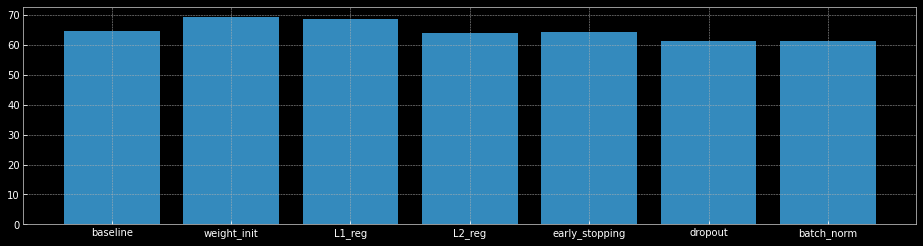

In [60]:
labels = [
    "baseline",
    "weight_init",
    "L1_reg", 
    "L2_reg",
    "early_stopping",
    "dropout",
    "batch_norm"
]
val_accs = [
    history_val_acc_0[-1],
    history_val_acc_1[-1],
    history_val_acc_2[-1],
    history_val_acc_3[-1],
    history_val_acc_4[-1],
    history_val_acc_5[-1],
    history_val_acc_6[-1],
]
plt.bar(labels, val_accs)

In [61]:
# weights = torch.Tensor().to(device)
# for param_group in list(model.parameters()):
#     weights = torch.cat((param_group.view(-1), weights))
#     print(param_group.size())
    
# # Toggle 0: No regularization
# weights_nothing = weights.cpu().detach().numpy()

# # Toggle 1: L1 norm on FC1
# # weights_L1 = weights.detach().numpy()

# # Toggle 2: L2 norm
# # weights_L2 = weights.detach().numpy()

# # Toggle 3: dropout
# # weights_dropout = weights.detach().numpy()

In [62]:
# plt.hist(weights_L1.reshape(-1), range=(-.5, .5), bins=20)

In [63]:
# plt.hist(weights_nothing.reshape(-1), range=(-.5, .5), bins=20)

In [64]:
# # Show weight distribution
# plt.hist((
#     weights_nothing.reshape(-1),
#     weights_L1.reshape(-1),
#     weights_L2.reshape(-1),
# ), 49, range=(-.5, .5), label=(
#     'No-reg',
#     'L1',
#     'L2',
# ))
# plt.legend();